In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout

### Remove corrupted images

In [8]:
num_skipped = 0
for folder_name in ('Cat', 'Dog'):
    folder_path = os.path.join("data", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        extention = fname.split('.')[-1]
        try:
            fobj = open(fpath, "rb")
            is_jfif = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif or extention != 'jpg':
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print(f"Deleted {num_skipped} images.")

Deleted 0 images.


### Make train and validation datasets

In [2]:
data = image_dataset_from_directory(
    'data/',
    image_size=(128, 128),
)

Found 23422 files belonging to 2 classes.


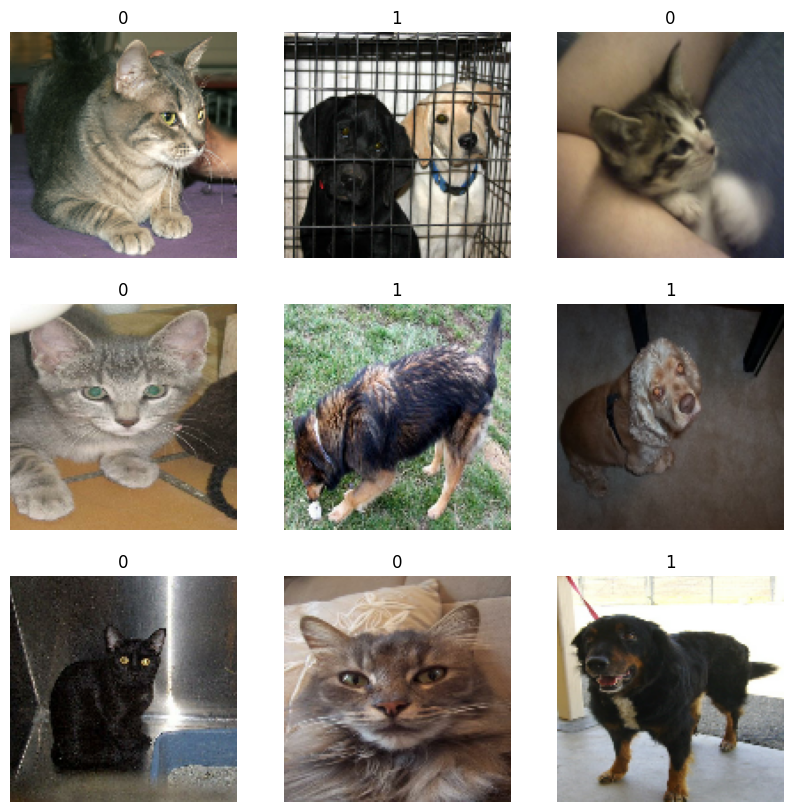

In [3]:
plt.figure(figsize=(10, 10))
for images, labels in data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype(int))
        plt.title(int(labels[i]))
        plt.axis("off")

In [4]:
data = data.map(lambda x, y: (x / 255.0, y))

In [5]:
train_size = int(len(data) * 0.7) + 1
valid_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

In [6]:
train_data = data.take(train_size)
valid_data = data.skip(train_size).take(valid_size)
test_data = data.skip(train_size + valid_size).take(test_size)

### Make model

In [18]:
cnn = tf.keras.Sequential()

In [19]:
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=1, activation='sigmoid'))

In [20]:
cnn.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
hist = cnn.fit(x=train_data, epochs=20, validation_data=valid_data)

Epoch 1/20
513/513 ━━━━━━━━━━━━━━━━━━━━ 98s 188ms/step - accuracy: 0.5809 - loss: 0.6687 - val_accuracy: 0.7125 - val_loss: 0.5798
Epoch 2/20
310/513 ━━━━━━━━━━━━━━━━━━━━ 33s 164ms/step - accuracy: 0.7274 - loss: 0.5407


KeyboardInterrupt



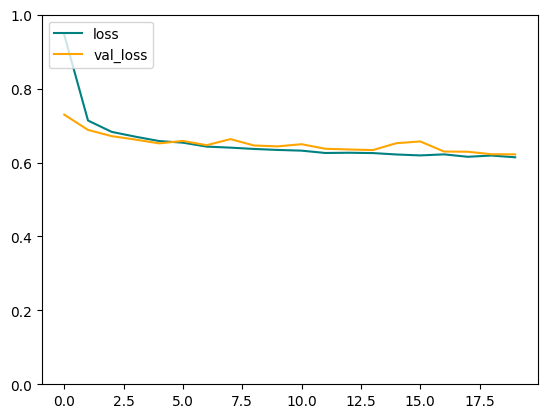

In [62]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.legend(loc='upper left')
plt.ylim(0, 1)
plt.show()

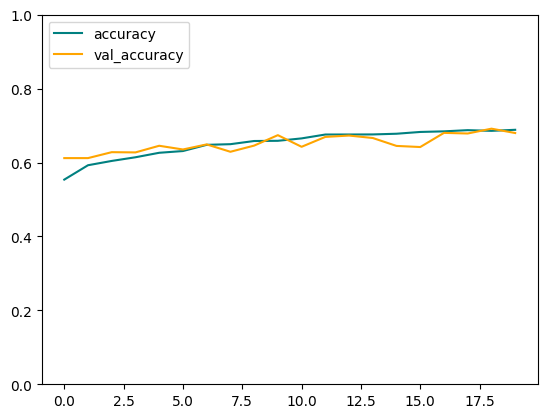

In [63]:
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.legend(loc='upper left')
plt.ylim(0, 1)
plt.show()